# On this notebook i will use already pre trained models for face detection among other features

## Importing the necessary libraries

In [1]:
from keras.models import load_model
from PIL import Image
from IPython.display import Image
#from tensorflow.keras.preprocessing.image import load_img

import matplotlib.pyplot as plt
import pylab
import numpy as np
import cv2
import os

%matplotlib inline

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## Loading the pre trained models

In [4]:
age_model = load_model('../models/age_model_pretrained.h5')
gender_model = load_model('../models/gender_model_pretrained.h5')
emotion_model = load_model('../models/emotion_model_pretrained.h5')

### Specifying the labels

In [5]:
#labels

age_labels = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_labels = ['male', 'female']
emotion_labels = ['Happy', 'Angry/Sad', 'Neutral']

## loading some test images

In [6]:
#test images

man_test_1 = '../tests/test_images/man-lowres.png'
man_test_2 = '../tests/test_images/man-background.png'
man_test_3 = '../tests/test_images/man-kn95.jpg'
man_test_4 = '../tests/test_images/man.jpg'
man_test_5 = '../tests/test_images/kartik_aryan.jpg'

woman_test_1 = '../tests/test_images/woman-hijab.jpg'


group_test_1 = '../tests/test_images/group-angle.jpg'
group_test_2 = '../tests/test_images/group-big.jpg'
group_test_3 = '../tests/test_images/family.jpg'
group_test_4 = '../tests/test_images/group-lowres.jpg'

group_test_5 = '../tests/test_images/group-child.jpg'

img_path = '../tests/test_images/priyanka_chopra.jpg'

In [7]:
# pil_image = Image(filename=woman_test_1)
# display(pil_image)

In [8]:
cv2.imread(img_path).shape

(600, 643, 3)

## writing the predict function

this function use haar cascade algorithm from opencv to firstly detect the faces on the image, and then, it makes the prediction of the three models of each of the faces present.

In [9]:
def prediction(img):
    test_image = cv2.imread(img)
    gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('../models/cv2_cascade_classifier/haarcascade_frontalface_default.xml')
    #glass_cascade
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    if len(faces)==0:
        return 'Face Not Detected'
    else:
        i = 0
        subjects = []
        for (x,y,w,h) in faces:
            i = i+1
            cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

            img_gray= gray[y:y+h,x:x+w]

            #emotion prediction
            emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
            emotion_img_array = np.array(emotion_img)
            emotion_input = np.expand_dims(emotion_img_array, axis=0)
            output_emotion = emotion_labels[np.argmax(emotion_model.predict(emotion_input, verbose=0))]

            #gender prediction
            gender_img= cv2.resize(img_gray, (100,100), interpolation = cv2.INTER_AREA)
            gender_img_array = np.array(gender_img)
            gender_input = np.expand_dims(gender_img_array, axis=0)
            output_gender = gender_labels[np.argmax(gender_model.predict(gender_input, verbose=0))]

            #age prediction
            age_img = cv2.resize(img_gray, (200,200), interpolation = cv2.INTER_AREA)
            age_input = age_img.reshape(-1, 200, 200, 1)
            output_age = age_labels[np.argmax(age_model.predict(age_input, verbose=0))]

            output_str = f'\nSubject: {str(i)} \nGender: {output_gender} \nAge range: {output_age} \nEmotion: {output_emotion}\n'
            #print(output_str)

            info= {'Subject': i, 'Gender': output_gender, 'Age': output_age, 'Emotion': output_emotion}
            subjects.append(info)
            col = (0,255,0)
            cv2.putText(test_image, str(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)
        
   
    return subjects,  plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

### Testing the results

([{'Subject': 1, 'Gender': 'male', 'Age': '46-65', 'Emotion': 'Happy'},
  {'Subject': 2, 'Gender': 'male', 'Age': '28-45', 'Emotion': 'Happy'},
  {'Subject': 3, 'Gender': 'female', 'Age': '28-45', 'Emotion': 'Happy'},
  {'Subject': 4, 'Gender': 'female', 'Age': '10-20', 'Emotion': 'Happy'}],
 <matplotlib.image.AxesImage at 0x7f580859e6a0>)

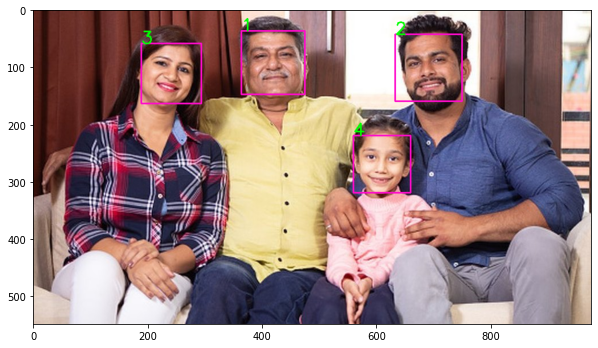

In [10]:
result = prediction(group_test_3)
result